In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


In [3]:
df = pd.read_csv("../code/dataset/Churn_Modelling.csv")

In [4]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9897,9898,15810563,Ho,678,Spain,Female,61,8,0.00,2,1,1,159938.82,0
253,254,15694717,Ku,544,Germany,Male,37,2,79731.91,1,1,1,57558.95,0
8470,8471,15582847,Yermakova,662,France,Male,26,0,0.00,2,0,1,72929.96,0
5269,5270,15732281,Ugoji,680,Germany,Male,34,6,146422.22,1,1,0,67142.97,1
5134,5135,15641604,Frolova,850,France,Female,55,10,98488.08,1,1,0,155879.57,1


In [5]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1849,1850,15583090,Komar,581,Spain,Female,29,8,0.00,2,1,0,46735.19,0
1435,1436,15596021,K?,598,Spain,Male,44,8,0.00,2,1,0,148487.90,0
151,152,15759618,Alexeeva,535,France,Female,48,9,0.00,1,1,0,149892.79,1
8122,8123,15603749,Galkina,564,France,Female,53,2,45472.28,1,1,1,41055.71,1
6082,6083,15636820,Loggia,725,Germany,Male,40,8,104149.66,1,1,0,62027.90,0


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:

numerical = df.select_dtypes(include=["int64","float64"])
categorical = df.select_dtypes(include=["object"])


In [11]:

numerical.corr()["Exited"]<0.1

RowNumber           True
CustomerId          True
CreditScore         True
Age                False
Tenure              True
Balance            False
NumOfProducts       True
HasCrCard           True
IsActiveMember      True
EstimatedSalary     True
Exited             False
Name: Exited, dtype: bool

In [12]:
numerical.corr()["Exited"]<0.1

RowNumber           True
CustomerId          True
CreditScore         True
Age                False
Tenure              True
Balance            False
NumOfProducts       True
HasCrCard           True
IsActiveMember      True
EstimatedSalary     True
Exited             False
Name: Exited, dtype: bool

In [13]:
delete_col = numerical.columns[numerical.corr()["Exited"]<0.1]
delete_col 

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Tenure', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [14]:
df = df.drop(columns=delete_col)
df.head(5)

,Surname,Geography,Gender,Age,Balance,Exited
0,Hargrave,France,Female,42,0.00,1
1,Hill,Spain,Female,41,83807.86,0
2,Onio,France,Female,42,159660.80,1
3,Boni,France,Female,39,0.00,0
4,Mitchell,Spain,Female,43,125510.82,0


In [15]:
df = df.drop(columns=["Surname"])
df.head(4)

,Geography,Gender,Age,Balance,Exited
0,France,Female,42,0.00,1
1,Spain,Female,41,83807.86,0
2,France,Female,42,159660.80,1
3,France,Female,39,0.00,0


<Axes: xlabel='Exited', ylabel='Balance'>

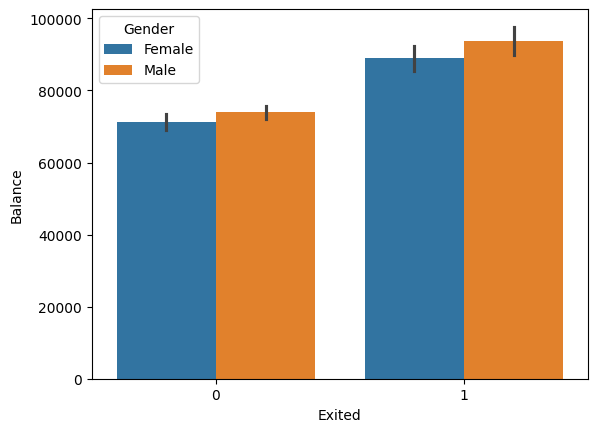

In [16]:
sns.barplot(data=df,x="Exited",y="Balance",hue="Gender")

<Axes: xlabel='Geography', ylabel='Exited'>

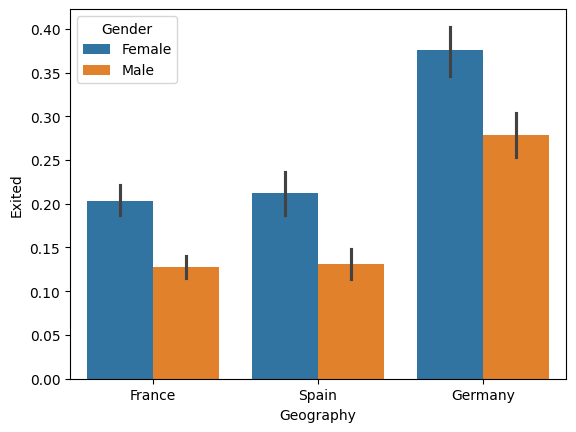

In [17]:
sns.barplot(data=df,x="Geography",y="Exited",hue="Gender")

In [18]:
df.sample(5)

,Geography,Gender,Age,Balance,Exited
5974,France,Male,45,96877.21,0
2741,France,Female,38,0.00,0
6009,Spain,Male,33,0.00,0
7386,Germany,Female,37,158468.76,0
8857,France,Male,36,0.00,0


In [19]:
X_train,X_test,y_train,y_test = train_test_split(
    df.iloc[:,:3],
    df["Exited"],
    test_size=0.1
)

In [20]:
X_train

,Geography,Gender,Age
8227,France,Female,30
1309,Spain,Male,30
8224,France,Male,50
1785,Germany,Male,40
7350,Spain,Male,25
...,...,...,...
3853,Germany,Male,43
2352,Spain,Female,45
1558,France,Female,35
6954,France,Male,38


In [21]:
trans1 = ColumnTransformer(
    transformers=[
        ("ohe",OneHotEncoder(handle_unknown="ignore",drop="first"),[0,1])
    ],remainder="passthrough"
)

In [22]:
trans2 = ColumnTransformer(
    transformers=[
        ("scaling",StandardScaler(),slice(0,4))
    ]
)

In [23]:
pipe = Pipeline(
    [
        ("trans1",trans1),
        ("trans2",trans2)
    ]
)
pipe.fit(X_train,y_train)

Pipeline(steps=[('trans1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  [0, 1])])),
                ('trans2',
                 ColumnTransformer(transformers=[('scaling', StandardScaler(),
                                                  slice(0, 4, None))]))])

In [24]:
X_train = pipe.fit_transform(X_train)

In [25]:
X_train

array([[-0.5776924 , -0.57752134, -1.09911196, -0.85390457],
       [-0.5776924 ,  1.73153776,  0.90982542, -0.85390457],
       [-0.5776924 , -0.57752134,  0.90982542,  1.05589802],
       ...,
       [-0.5776924 , -0.57752134, -1.09911196, -0.37645392],
       [-0.5776924 , -0.57752134,  0.90982542, -0.08998353],
       [-0.5776924 , -0.57752134,  0.90982542,  0.86491776]])

<br>

# Now, Make the deep learning model:

<br>

In [26]:
relu = tf.keras.activations.relu
sigmoid = tf.keras.activations.sigmoid

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4,activation=relu,input_dim=4))
model.add(tf.keras.layers.Dense(2,activation=relu))
model.add(tf.keras.layers.Dense(1,activation=sigmoid))

model.summary()


/home/yasin/allProgram/100DaysDL/code/venvML/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (132.00 B)

 Trainable params: 33 (132.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
loss = tf.keras.losses.BinaryCrossentropy()
adam = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(loss=loss,optimizer=adam,metrics=["accuracy"])

In [28]:
model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7533 - loss: 0.5358 - val_accuracy: 0.7922 - val_loss: 0.4345
Epoch 2/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7982 - loss: 0.4358 - val_accuracy: 0.7922 - val_loss: 0.4319
Epoch 3/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7929 - loss: 0.4378 - val_accuracy: 0.7922 - val_loss: 0.4329
Epoch 4/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7905 - loss: 0.4374 - val_accuracy: 0.7922 - val_loss: 0.4294
Epoch 5/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7962 - loss: 0.4341 - val_accuracy: 0.7922 - val_loss: 0.4273
Epoch 6/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7883 - loss: 0.4376 - val_accuracy: 0.7922 - val_loss: 0.4286
Epoch 7/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8062 - loss: 0.4197 - val_accuracy: 0.7922 - val_loss: 0.4293
Epoch 8/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7968 - loss: 0.4323 - val_accuracy: 0.